## <font color='darkblue'><b>Preface</b></font>
Here we are going to use a toy testing environment `GridWorld` to demonstrate the usage of this lab.

### <font color='darkgreen'>Importing Packages</font>
Firstly, let's import all the necessary packages:

In [1]:
import pandas as pd
import seaborn as sns
from pprint import pprint

from skyline import lab
from skyline.lab import gridworld_env
from skyline.lab import gridworld_utils
from skyline.alg import monte_carlo
from skyline.alg import random_rl

### <font color='darkgreen'>A classic RL environment</font>
From a classic RL problem, it is composed of below component:
![RL diagram](images/skyline_demo_1.PNG)

### <font color='darkgreen'>Make Lab Environment</font>
We can list supported environment as below:

In [2]:
lab.list_env()

===== GridWorld =====
This is a environment to show case of Skyline lab. The environment is a grid world where you can move up, down, right and left if you don't encounter obstacle. When you obtain the reward (-1, 1, 2), the game is over. You can use env.info() to learn more.

===== BCSTWorld =====
This is a environment designed for BCST testing to select test cases so to compose optimal execution sequence so to catch crash/ramdump as much as possible.




Then We use function <font color='blue'>`make`</font> to obtain the desired environment. e.g. <font color='blue'><b>GridWorldEnvironment</b></font>:

In [3]:
grid_env = lab.make(lab.Env.GridWorld)

From Skyline, all environments need to inherit from this class <b><font color='blue'>Environment(Protocol)</font></b>. Here we are going to examine some methods expected or required from a Skyline environment:

#### <b><font color='blue'>info</font></b>: Gets environment information.
We use method `info` to obtain description of current environment for ML engineers to know what kind of problem they are dealing with.

In [4]:
# Check what our environment looks like:
grid_env.info()

- environment is a grid world
- x means you can't go there
- s means start position
- number means reward at that state
.  .  .  1
.  x  . -1
.  .  .  x
s  x  .  2



#### <b><font color='blue'>available_actions/available_actions_from_current_state</font></b>: Gets available actions supported by the environment
We use method `available_actions` to learn what actions agent could take to interact with the environment.

In [5]:
# Show available actions
grid_env.available_actions()

['U', 'D', 'L', 'R']

In [6]:
# Get current state
grid_env.current_state

GridState(i=3, j=0)

In [7]:
grid_env.reset()

# Take action 'Up'
grid_env.step('U')

grid_env.available_actions_from_current_state()

('U', 'D', 'R')

#### <b><font color='blue'>step</font></b>: Takes action in the environment.
The agent use method `step` to interact with the environment. Let's take a action and check the state change:

In [8]:
# Take action 'Up'
grid_env.step('U')

# Check current state
grid_env.current_state

GridState(i=1, j=0)

After taking action `U`, we expect the axis-i to move up from 2->1 and we can confirm it from the output state. Let's reset the environment by calling method <font color='blue'>reset</font> which will bring the state of environment back to intial state `GridState(i=3, j=0)`:

In [9]:
# Reset environment
grid_env.reset()

# Check current state
grid_env.current_state

GridState(i=3, j=0)

#### <b><font color='blue'>render</font></b>: Show the environment at current state.
The `render` method can be used to present the environment in a human-readable format.

In [10]:
grid_env.render()

  .  .  .  1
  .  x  . -1
  .  .  .  x
  s  x  .  2



In [11]:
# Take action 'Up'
grid_env.step('U')

grid_env.render()

  .  .  .  1
  .  x  . -1
  +  .  .  x
  s  x  .  2



## <font color='darkblue'><b>Experiments of RL algorithms</b></font>
Here we are going to test some well-known RL algorithms and demonstrate the usage in apply them to tackle the environment (problem).

<a id='rl_alg_monte_carlo'></a>
### <font color='darkgreen'>Monte Carlo Method</font>
<b>In this method, we simply simulate many trajectories ([decision processes](https://docs.google.com/presentation/d/1pvKFeIMouBd0Hm0znV5DP9B3xcT2LL6hraXQR7OKYBo/edit?resourcekey=0-xw_mVtLG4xylui6VmBcReA&disco=AAAAtSXswtU)), and calculate the average returns.</b> ([wiki page](https://en.wikiversity.org/wiki/Reinforcement_Learning#Monte_Carlo_policy_evaluation))

We implement this algorithm in [`monte_carlo.py`](https://github.com/google/skyline_rl_lab/blob/main/skyline/alg/monte_carlo.py). The code below will demonstrate the usage of it:

In [12]:
# Initializes our RL algorithm/approach
mc_alg = monte_carlo.MonteCarlo()

In [13]:
# Shows the environment we are going to learn.
grid_env.info()

- environment is a grid world
- x means you can't go there
- s means start position
- number means reward at that state
.  .  .  1
.  x  . -1
.  .  .  x
s  x  .  2



In [14]:
# Show random available from given state in the target environment
grid_env.random_action(gridworld_env.GridState(1, 0))

'U'

#### <b>Training</b>
To start training, we pass the environment object into the <font color='blue'>`fit`</font> method of the RL algorithm specified in the Skyline protocol [`RLAlgorithmProto`](https://source.corp.google.com/piper///depot/google3/wireless/android/pixel/testing/skyline/rl_protos.py?q=class:RLAlgorithmProto).

In [15]:
%%time
# Training
mc_alg.fit(grid_env)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3342.49it/s]

CPU times: user 2.95 s, sys: 192 ms, total: 3.14 s
Wall time: 3 s


Let's check what [`value function`](https://en.wikipedia.org/wiki/Reinforcement_learning#Value_function) we get:

In [16]:
gridworld_utils.print_values(mc_alg._state_2_value, grid_env)

---------------------------
 1.18| 1.31| 1.46| 1.00|
---------------------------
 1.31| 0.00| 1.62|-1.00|
---------------------------
 1.46| 1.62| 1.80| 0.00|
---------------------------
 1.31| 0.00| 2.00| 2.00|


Next, let's print the learned [`policy`](https://en.wikipedia.org/wiki/Reinforcement_learning#Policy):

In [17]:
gridworld_utils.print_policy(mc_alg._policy, grid_env)

---------------------------
  D  |  R  |  D  |  ?  |
---------------------------
  D  |  x  |  D  |  ?  |
---------------------------
  R  |  R  |  D  |  x  |
---------------------------
  U  |  x  |  R  |  ?  |


#### <b>Playing</b>
Finally, let's reset the environment and play the game:

In [18]:
# Play game util done
grid_env.reset()

print(f'Begin state={grid_env.current_state}')
step_count = 0
while not grid_env.is_done:
    result = mc_alg.play(grid_env)
    step_count += 1
    print(result)

print(f'Final reward={result.reward} with {step_count} step(s)')

Begin state=GridState(i=3, j=0)
ActionResult(action=np.str_('U'), state=GridState(i=2, j=0), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action=np.str_('R'), state=GridState(i=2, j=1), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action=np.str_('R'), state=GridState(i=2, j=2), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action=np.str_('D'), state=GridState(i=3, j=2), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action=np.str_('R'), state=GridState(i=3, j=3), reward=2, is_done=True, is_truncated=False, info=None)
Final reward=2 with 5 step(s)


<a id='rl_alg_random'></a>
### <font color='darkgreen'>Random Method (Baseline)</font>
This method **[`RandomRL`](https://github.com/google/skyline_rl_lab/blob/main/skyline/alg/random_rl.py#L22)** takes random action in the given environment. It is often used as a based line to evaluate other RL methods.

In [19]:
# Initializes RL algorithm/approach
random_alg = random_rl.RandomRL()

#### <b>Training</b>
Random won't require any training and therefore below call should end in no time.

In [20]:
%%time
# Training
random_alg.fit(grid_env)

CPU times: user 6 μs, sys: 0 ns, total: 6 μs
Wall time: 12.4 μs


#### <b>Playing</b>
Since this is a random process, each time you play the game will have difference result:

In [21]:
# Play game util done
grid_env.reset()

print(f'Begin state={grid_env.current_state}')
step_count = 0
while not grid_env.is_done:
    result = random_alg.play(grid_env)
    step_count += 1
    print(result)
print(f'Final reward={result.reward} with {step_count} step(s)')

Begin state=GridState(i=3, j=0)
ActionResult(action='U', state=GridState(i=2, j=0), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='D', state=GridState(i=3, j=0), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='U', state=GridState(i=2, j=0), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='D', state=GridState(i=3, j=0), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='U', state=GridState(i=2, j=0), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='U', state=GridState(i=1, j=0), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='U', state=GridState(i=0, j=0), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='R', state=GridState(i=0, j=1), reward=0, is_done=False, is_truncated=False, info=None)
ActionResult(action='R', state=GridState(i=0, j=2), reward=0, is_done=False, is_truncated=False, info=No

From the result above, it is obvious that the [**Monte Carlo Method**](#rl_alg_monte_carlo) performs much better than the [**Random Method**](#rl_alg_random)!

## <font color='darkblue'><b>How to rank RL methods</b></font>
Before we can explain how the scoreboard works, we need to understand **[RLExaminer](https://github.com/google/skyline_rl_lab/blob/main/skyline/rl_protos.py#L106)** first. In short, the scoreboard is a tool designed to help you rank different RL methods.

### <font color='darkgreen'><b>RLExaminer</b></font>
Each environment can have more than one <b><font color='darkblue'>examiner</font></b> to calculate the score of an RL method. Each examiner may have its own criteria for evaluating the RL method (<font color='brown'>time, reward, etc.</font>). Let's take a look at one examiner that is used to calculate the average reward of a grid environment.

In [22]:
# This examiner considers both reward and number of steps.
examiner = gridworld_env.GridWorldExaminer()

Then, what's score of [Monte Carlo Method](#rl_alg_monte_carlo):

In [23]:
# Monte Carlo will get reward 2 by taking 5 steps.
# So the score will be reward / steps: 2 / 5 = 0.4
examiner.score(
  rl_method = mc_alg,
  env = grid_env)

(0.4, [0.4])

Monte Carlo method got score 0.4. Let's check another RL method [Random Method](#rl_alg_random):

In [24]:
# The number of steps required by random RL method is unknown.
# Also the best reward is not guaranteed. So the score here will be random.
examiner.score(random_alg, grid_env)

(0.05, [0.05])

It is expected that the random RL method, as a baseline, will receive a lower score than the Monte Carlo method.

### <font color='darkgreen'><b>Scoreboard</b></font>
The scoreboard literally calculates the scores of given RL methods according to the specific examiner and then ranks those RL methods accordingly. For example:

In [25]:
score_board = lab.Scoreboard()
sorted_scores  = score_board.rank(
    examiner = examiner,
    env = grid_env,
    rl_methods = [random_alg, mc_alg],
    show_ranking_in_console=True)

+-------+------------+----------------+
| Rank. |  RL Name   |     Score      |
+-------+------------+----------------+
|   1   | MonteCarlo |  (0.4, [0.4])  |
|   2   |  RandomRL  | (0.13, [0.13]) |
+-------+------------+----------------+


## <font color='darkblue'><b>Real world example - BCST 2.0</b></font>
Each project owner can wrap up their RL problem in an Environment so that ML people can figure out the best approach to solve it. For example, the **[BCST](go/bt-combination-test)** environment **[`BCSTEnvironment`](https://github.com/google/skyline_rl_lab/blob/main/skyline/lab/bcst_tc_env.py#L59)** is a specific type of environment/problem we would like to resolve from our team:

### <font color='darkgreen'>Explore the environment</font>

In [26]:
import matplotlib.pyplot as plt
from skyline.lab import bcst_tc_env

Let's initialize the environment and show info of it:

In [27]:
bcst_env = bcst_tc_env.BCSTEnvironment()
bcst_env.info()

- Environment as BCST testing environment.
- You can set attribute `round_num` of environment to decide the max round  of execution.
- Each action is a test case to select.
- State is the sequence of last executed test case sequence.
- A reward equal to 1 means the execution resulted in a crash/ramdump or 0 means nothing was caught.


The Skyline environment implements predefined methods that an RL agent can use to interact with and learn from it. This allows the agent to accumulate knowledge on how to maximize the reward it receives from the environment.

Let's use the Monte Carlo method to demonstrate this process.

### <font color='darkgreen'>Baselin: Monte Carlo</font>

In [28]:
mc_alg_r100 = monte_carlo.MonteCarlo(name='r100', round_num=100)
mc_alg_r200 = monte_carlo.MonteCarlo(name='r200', round_num=200)
mc_alg_r1000 = monte_carlo.MonteCarlo(name='r1000', round_num=1000)

In [29]:
%%time
mc_alg_r100.fit(bcst_env)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 422.03it/s]

CPU times: user 227 ms, sys: 35.7 ms, total: 263 ms
Wall time: 244 ms


In [30]:
%%time
mc_alg_r200.fit(bcst_env)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 454.62it/s]

CPU times: user 444 ms, sys: 16.2 ms, total: 460 ms
Wall time: 446 ms


In [31]:
%%time
mc_alg_r1000.fit(bcst_env)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 445.44it/s]

CPU times: user 2.19 s, sys: 168 ms, total: 2.35 s
Wall time: 2.25 s


In [32]:
bcst_examiner = bcst_tc_env.BCSTRewardCountExaminer()
score, r100_data = bcst_examiner.score(
    mc_alg_r100, bcst_env, play_round=15)

In [33]:
score, r200_data = bcst_examiner.score(
    mc_alg_r200, bcst_env, play_round=15)

In [34]:
score, r1000_data = bcst_examiner.score(
    mc_alg_r1000, bcst_env, play_round=20)

<Axes: title={'center': 'RL method (Monte Carlo) on environment BCST test case execution simulator'}>

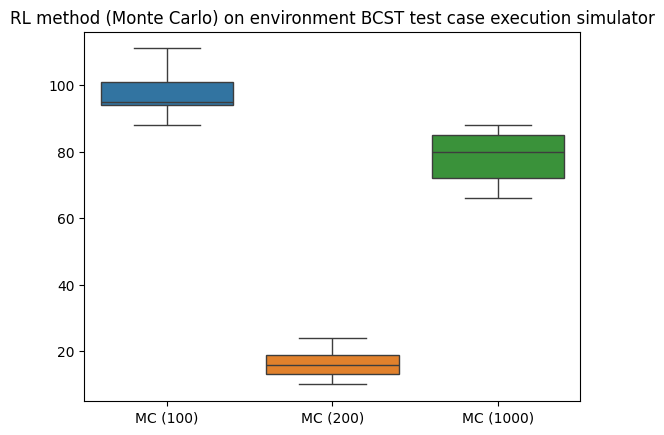

In [35]:
_, ax = plt.subplots()
ax.set_title(f'RL method (Monte Carlo) on environment {bcst_env.name}')

data = []
for c1, c2, c3 in zip(r100_data, r200_data, r1000_data):
  data.append([c1, c2, c3])

df = pd.DataFrame(data=data, columns = ['MC (100)', 'MC (200)', 'MC (1000)'])

sns.boxplot(data=df)

In [36]:
sorted_scores = score_board.rank(
    examiner=bcst_examiner, env=bcst_env,
    rl_methods=[mc_alg_r100, mc_alg_r200, mc_alg_r1000],
    show_ranking_in_console=True)

+-------+---------+----------------------------------------------------------+
| Rank. | RL Name |                          Score                           |
+-------+---------+----------------------------------------------------------+
|   1   |   r100  | (100.2, [99, 92, 103, 102, 100, 104, 106, 94, 101, 101]) |
|   2   |  r1000  |     (81.4, [83, 74, 70, 72, 86, 88, 87, 90, 86, 78])     |
|   3   |   r200  |     (14.6, [14, 19, 16, 13, 10, 18, 13, 12, 10, 21])     |
+-------+---------+----------------------------------------------------------+


### <font color='darkgreen'>BCST Advanced Epison Greedy</font>

In [37]:
from skyline.alg import bcst_epsilon_tcs_rl

bcst_tcs_alg = bcst_epsilon_tcs_rl.EGreedyStrategy(
  delta= 0,  round_num=500)

In [38]:
%%time
bcst_tcs_alg.fit(bcst_env)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:16<00:00, 29.91it/s]

CPU times: user 16.7 s, sys: 79 ms, total: 16.8 s
Wall time: 16.7 s


In [39]:
score, bcst_tcs_alg_data = bcst_examiner.score(bcst_tcs_alg, bcst_env, play_round=20)

In [40]:
sorted_scores = score_board.rank(
    examiner=bcst_examiner, env=bcst_env,
    rl_methods=[mc_alg_r100, mc_alg_r200, mc_alg_r1000, bcst_tcs_alg], show_ranking_in_console=True)

+-------+-----------------+-------------------------------------------------------------+
| Rank. |     RL Name     |                            Score                            |
+-------+-----------------+-------------------------------------------------------------+
|   1   | EGreedyStrategy | (175.4, [150, 141, 182, 186, 178, 193, 186, 182, 184, 172]) |
|   2   |       r100      |      (98.2, [99, 96, 97, 98, 95, 94, 104, 99, 102, 98])     |
|   3   |      r1000      |       (79.3, [79, 86, 85, 82, 72, 85, 75, 69, 80, 80])      |
|   4   |       r200      |       (15.4, [16, 20, 13, 14, 14, 13, 13, 15, 17, 19])      |
+-------+-----------------+-------------------------------------------------------------+


### <font color='darkgreen'>Examiner for diversity</font>
Examiner **<font color='blue'>BCSTRewardCountExaminer</font> focus on the quanity of Crash/Ramdump RL alg could catch. It may lead to a problem/concern if a specific Crash/Ramdump could always happen**. Then the RL will learn greedily to catch that specific Crash/Ramdump and pay less attention to other potential Crash/Ramdump which is obviously a blind point to our RL algs.

So here we define another examiner <b><font color='blue'>BCSTRewardDiversityExaminer</font></b> which will take diversity of actions and kinds of reward into consideration when calculating the score. Let's give it a try below:

In [41]:
bcst_div_examiner = bcst_tc_env.BCSTRewardDiversityExaminer()

Firstly, let's check our base line Monte Carlo method (Let's abbreviate it as **MC**):

In [42]:
score, r1000_data, mc_collected_action_2_reward_info = bcst_div_examiner.score_with_action_2_reward_info(
    mc_alg_r1000, bcst_env, play_round=200)

In [43]:
mc_detected_path_with_reward_counts = list([len(record) for record in mc_collected_action_2_reward_info])
avg_detected_paths = sum(mc_detected_path_with_reward_counts) / len(mc_detected_path_with_reward_counts)
print(f'Avg detected distinct paths: {avg_detected_paths}')

Avg detected distinct paths: 6.26


Then is our champion <b><font color='blue'>EGreedyStrategy</font></b> (Let's abbreviate it as **EGS**):

In [44]:
bcst_tcs_alg = bcst_epsilon_tcs_rl.EGreedyStrategy(
  eps=0.8, delta= 0,  round_num=500)

score, eg_strategy_data, egs_collected_action_2_reward_info = bcst_div_examiner.score_with_action_2_reward_info(
    bcst_tcs_alg, bcst_env, play_round=100)

In [45]:
egs_detected_path_with_reward_counts = list([len(record) for record in egs_collected_action_2_reward_info])
avg_detected_paths = sum(egs_detected_path_with_reward_counts) / len(egs_detected_path_with_reward_counts)
print(f'Avg detected distinct paths: {avg_detected_paths}')

Avg detected distinct paths: 1.02


<Axes: title={'center': 'EGS vs MC on environment BCST test case execution simulator'}>

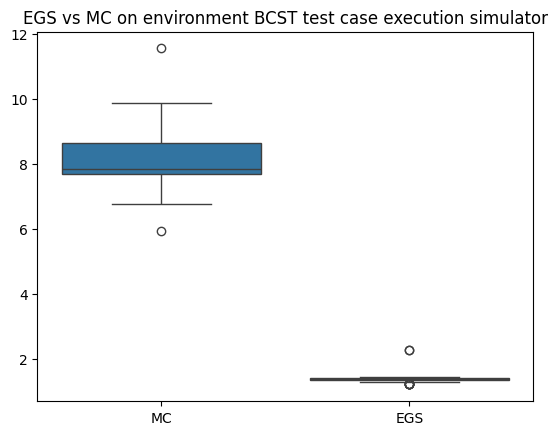

In [46]:
_, ax = plt.subplots()
ax.set_title(f'EGS vs MC on environment {bcst_env.name}')

data = []
for c1, c2 in zip(r1000_data, eg_strategy_data):
  data.append([c1, c2])

df = pd.DataFrame(data=data, columns = ['MC', 'EGS'])

sns.boxplot(data=df)

From above, <b><font color='darkred'>we learned that **EGS** doesn't perform better than **MC**. What a surprise!</font>

Now it is our time to know more about <b><font color='blue'>EGreedyStrategy</font></b> and see what parameters we could use to adjust it's behavior and tune the performance to favor diversity:

In [47]:
print(bcst_epsilon_tcs_rl.EGreedyStrategy.__doc__)

RL ε-Greedy Policy to select BCST test case.

  Attributes:
    eps: Epsilon value of ε-Greedy Policy. (default=0.3)
    beta: Beta value to decide the shrinking rate of Epsilon value when the
        round of test case selection grows. (default=0.1)
    gamma: Gamma value to decide the proportion of impact from future execution
        result. Larger this value, more influence granted from the future.
    delta: Delta value to decide the proportion of adopting the sequences from
        `pre_train_actions` if given.
    round_num: Maximum rounds required in training. (default=0.7)
    foremost_exploring_num: The fixed foremost number of test case selection set
        for exploration. (default=50)
    pre_train_actions: List of actions to select before the training.
    debug_mode: True to turn on debugging mode to print more information.
  


Let's try a different settings than default values:

In [48]:
bcst_tcs_alg_v2 = bcst_epsilon_tcs_rl.EGreedyStrategy(
    name='EGS v2', eps=0.2, beta=0, gama=0.4, delta= 0,
    foremost_exploring_num=200)

In [49]:
bcst_tcs_alg_v2.fit(bcst_env)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 30.60it/s]


In [50]:
score, eg_strategy_v2_data, egs_v2_collected_action_2_reward_info = bcst_div_examiner.score_with_action_2_reward_info(
    bcst_tcs_alg_v2, bcst_env, play_round=100)

In [51]:
egs_detected_path_with_reward_counts = list([len(record) for record in egs_v2_collected_action_2_reward_info])
avg_detected_paths = sum(egs_detected_path_with_reward_counts) / len(egs_detected_path_with_reward_counts)
print(f'Avg detected distinct paths: {avg_detected_paths}')

Avg detected distinct paths: 7.68


<Axes: title={'center': 'EGS vs MC on environment BCST test case execution simulator'}>

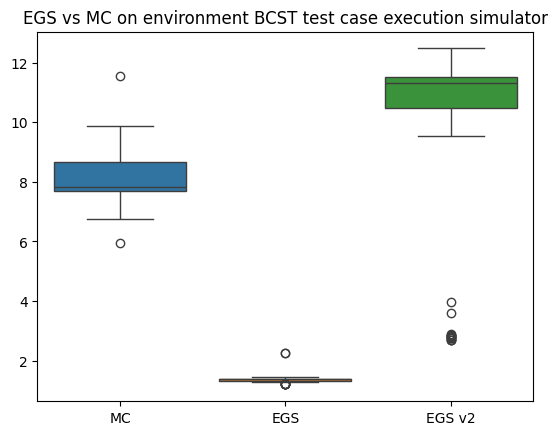

In [52]:
_, ax = plt.subplots()
ax.set_title(f'EGS vs MC on environment {bcst_env.name}')

data = []
for c1, c2, c3 in zip(r1000_data, eg_strategy_data, eg_strategy_v2_data):
  data.append([c1, c2, c3])

df = pd.DataFrame(data=data, columns = ['MC', 'EGS', 'EGS v2'])

sns.boxplot(data=df)

In [53]:
sorted_scores = score_board.rank(
    examiner=bcst_div_examiner, env=bcst_env,
    rl_methods=[mc_alg_r1000, bcst_tcs_alg, bcst_tcs_alg_v2], show_ranking_in_console=True)

+-------+-----------------+-------------------------------------------------------------------------------+
| Rank. |     RL Name     |                                     Score                                     |
+-------+-----------------+-------------------------------------------------------------------------------+
|   1   |      EGS v2     | (10.95, [10.55, 9.57, 11.56, 10.59, 10.6, 11.52, 11.34, 11.48, 10.51, 11.73]) |
|   2   |      r1000      |      (8.15, [7.73, 7.83, 7.78, 7.74, 9.58, 8.8, 8.69, 6.87, 7.82, 8.69])      |
|   3   | EGreedyStrategy |      (1.47, [1.38, 1.38, 2.31, 1.41, 1.38, 1.38, 1.39, 1.35, 1.28, 1.43])     |
+-------+-----------------+-------------------------------------------------------------------------------+
